In [1]:
pip install pdpbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 19.3 MB/s eta 0:00:00


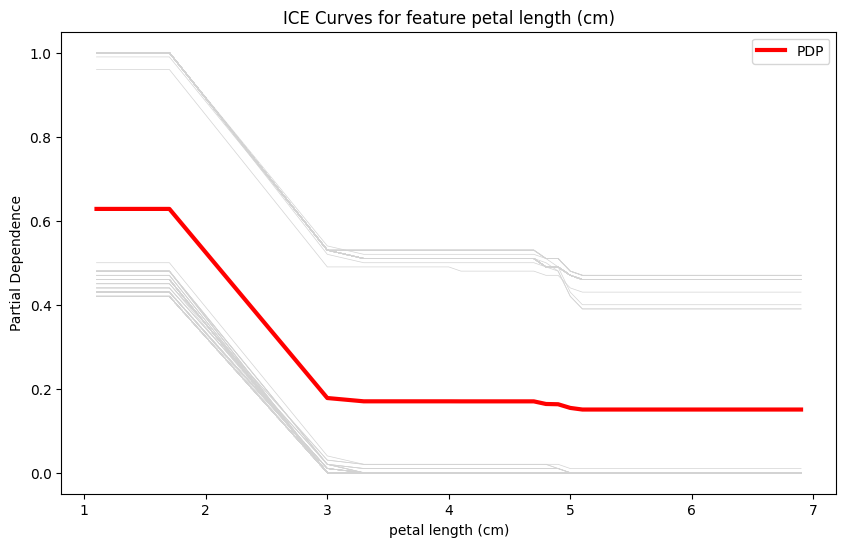

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pdpbox import pdp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

def plot_ice(clf, dataset, feature_names, feature_to_plot, grid_resolution=50, with_pdp=True):
    # Determine the index of the feature
    feature_index = feature_names.index(feature_to_plot)

    # Calculate the values for the ICE curves
    ice_results = partial_dependence(clf, X=dataset, features=[feature_index],
                                     grid_resolution=grid_resolution, kind='individual')

    # Get the feature values and predictions
    feature_values = ice_results['values'][0]
    ice_predictions = ice_results['individual'][0]

    # Plot the ICE curves
    plt.figure(figsize=(10, 6))
    for ice_pred in ice_predictions:
        plt.plot(feature_values, ice_pred, color='lightgray', linewidth=0.5)

    # Plot the PDP curve as the average of the ICE curves
    if with_pdp:
        pdp_values = np.mean(ice_predictions, axis=0)
        plt.plot(feature_values, pdp_values, color='red', linewidth=3, label='PDP')

    # Customize plot
    plt.title(f'ICE Curves for feature {feature_to_plot}')
    plt.xlabel(feature_to_plot)
    plt.ylabel('Partial Dependence')
    if with_pdp:
        plt.legend()

    # Show plot
    plt.show()

# Usage of the plot_ice function
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert X_train from a NumPy array to a pandas DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Define the feature to plot (must be a valid column name in X_train_df)
feature_to_plot = 'petal length (cm)'  # Use the exact string from the column names
plot_ice(rf, X_train_df, feature_names, feature_to_plot)
